# Функция модуляции передачи

In [3]:
from PIL import Image, ImageFile
from matplotlib import pyplot as plt

In [4]:
img1 = Image.open("1.png")
img1 = img1.rotate(5.71)
img2 = Image.open("2.png")
img2 = img2.rotate(5.71)


In [5]:
def get_avg_row_colors(image : ImageFile, step : int) -> list[float]:
    pixels = image.load()
    sums = [0] * image.width
    samples_count = [0] * image.width

    for y in range(0, image.height, step):
        for x in range(0, image.width):
            if pixels[x, y][3] == 0:
                continue
            sums[x] += pixels[x, y][0]
            samples_count[x] += 1

    avgs = []

    for x in range(0, image.width):
        avgs.append(sums[x] / samples_count[x])

    return avgs

In [6]:
def calc_line_blur(avgs : list[float]) -> list[float]:
    res = [0] * len(avgs)

    for i in range(1, len(avgs)):
        res[i] = abs(avgs[i - 1] - avgs[i])
        
    return res

In [7]:
def scale_avgs(avgs : list[float]) -> list[float]:
    return [avg / 255 for avg in avgs]

In [8]:
def find_10p_edges(scaled_avgs : list[float]) -> tuple[int]:
    start = end = 0

    for x in range(len(scaled_avgs)):
        if scaled_avgs[x] >= 0.1:
            start = x
            break
    for x in range(len(scaled_avgs) - 1, 0, -1):
        if scaled_avgs[x] <= 0.9:
            end = x
            break

    return start, end

In [9]:
def plot(title : str, vals_x : list[int], vals_y : list[float]) -> None:
    plt.figure(figsize=(10, 5))
    plt.plot(vals_x, vals_y)
    plt.axhline(y=0.9, color='r', linewidth=1)
    plt.axhline(y=0.1, color='r', linewidth=1)
    plt.title(title)
    plt.xlabel("Пиксели")
    plt.ylabel("Ср. яркость")
    plt.yticks([y * 0.1 for y in range(0, 11)])
    plt.grid()

In [10]:
def compare_plot(title : str, vals_x : list[int], vals_y1 : list[float], 
                 vals_y2 : list[float], label1 : str, label2 : str,
                 start1 : int, end1 : int, start2 : int, end2 : int) -> None:
    plt.figure(figsize=(20, 10))
    plt.plot(vals_x, vals_y1, color='g', label=label1, linewidth=4)
    plt.plot(vals_x, vals_y2, color='b', label=label2, linewidth=4)
    plt.axhline(y=0.9, color='r')
    plt.axhline(y=0.1, color='r')
    plt.axvline(x=start1, color='y')
    plt.axvline(x=end1, color='y')
    plt.axvline(x=start2, color='c')
    plt.axvline(x=end2, color='c')
    plt.title(title)
    plt.xlabel("Пискели")
    plt.ylabel("Ср. яркость")
    plt.yticks([y * 0.1 for y in range(0, 11)])
    plt.legend()
    plt.grid()

In [11]:
def compare_plot_frl(title : str, vals_x : list[int], vals_y1 : list[float], 
                 vals_y2 : list[float], label1 : str, label2 : str,
                 start1 : int, end1 : int, start2 : int, end2 : int, step : int = 1) -> None:
    plt.figure(figsize=(20, 10))
    vals_x = list(range(0, len(vals_x), step))
    vals_y1 = [vals_y1[i] for i in range(0, len(vals_y1), step)]
    vals_y2 = [vals_y2[i] for i in range(0, len(vals_y2), step)]
    plt.plot(vals_x, vals_y1, color='g', label=label1, linewidth=2)
    plt.plot(vals_x, vals_y2, color='b', label=label2, linewidth=2)
    plt.axvline(x=start1, color='y')
    plt.axvline(x=end1, color='y')
    plt.axvline(x=start2, color='c')
    plt.axvline(x=end2, color='c')
    plt.title(title)
    plt.xlabel("Пискели")
    plt.ylabel("Изменение яркости")
    plt.legend()
    plt.grid()

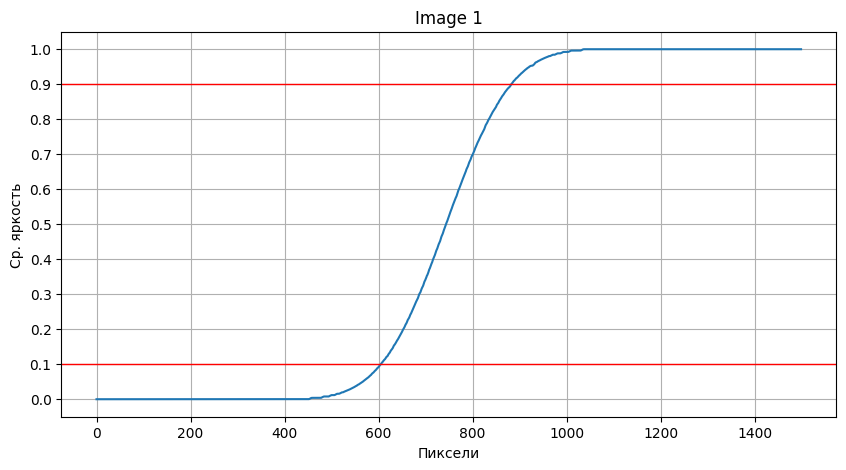

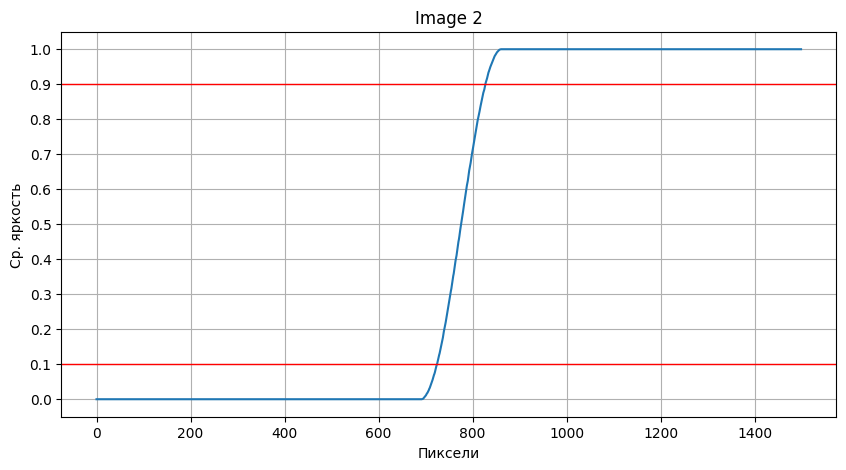

In [12]:
avgs1 = scale_avgs(get_avg_row_colors(img1, 50))
avgs2 = scale_avgs(get_avg_row_colors(img2, 50))

plot("Image 1", list(range(0, len(avgs1))), avgs1)
plot("Image 2", list(range(0, len(avgs2))) , avgs2)

In [13]:
s1, e1 = find_10p_edges(avgs1)
s2, e2 = find_10p_edges(avgs2)

print(f"10% - {s1}, 90% - {e1}, ширина перехода - {e1 - s1} px")
print(f"10% - {s2}, 90% - {e2}, ширина перехода - {e2 - s2} px")

10% - 605, 90% - 882, ширина перехода - 277 px
10% - 725, 90% - 827, ширина перехода - 102 px


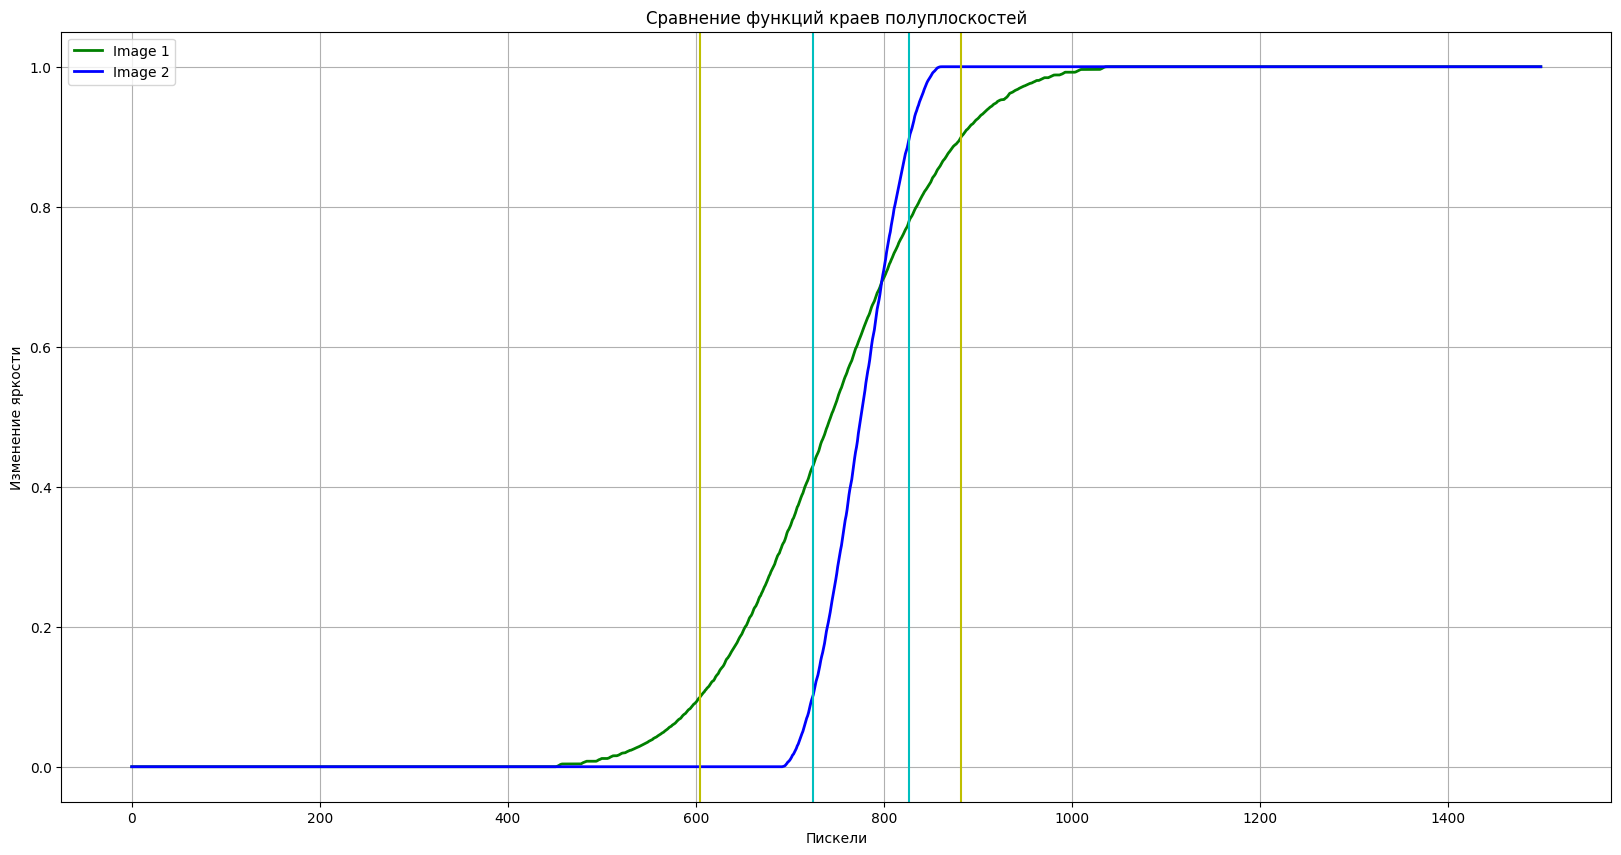

In [14]:
compare_plot_frl("Сравнение функций краев полуплоскостей", list(range(0, img1.width)), avgs1, avgs2, "Image 1", "Image 2", s1, e1, s2, e2)

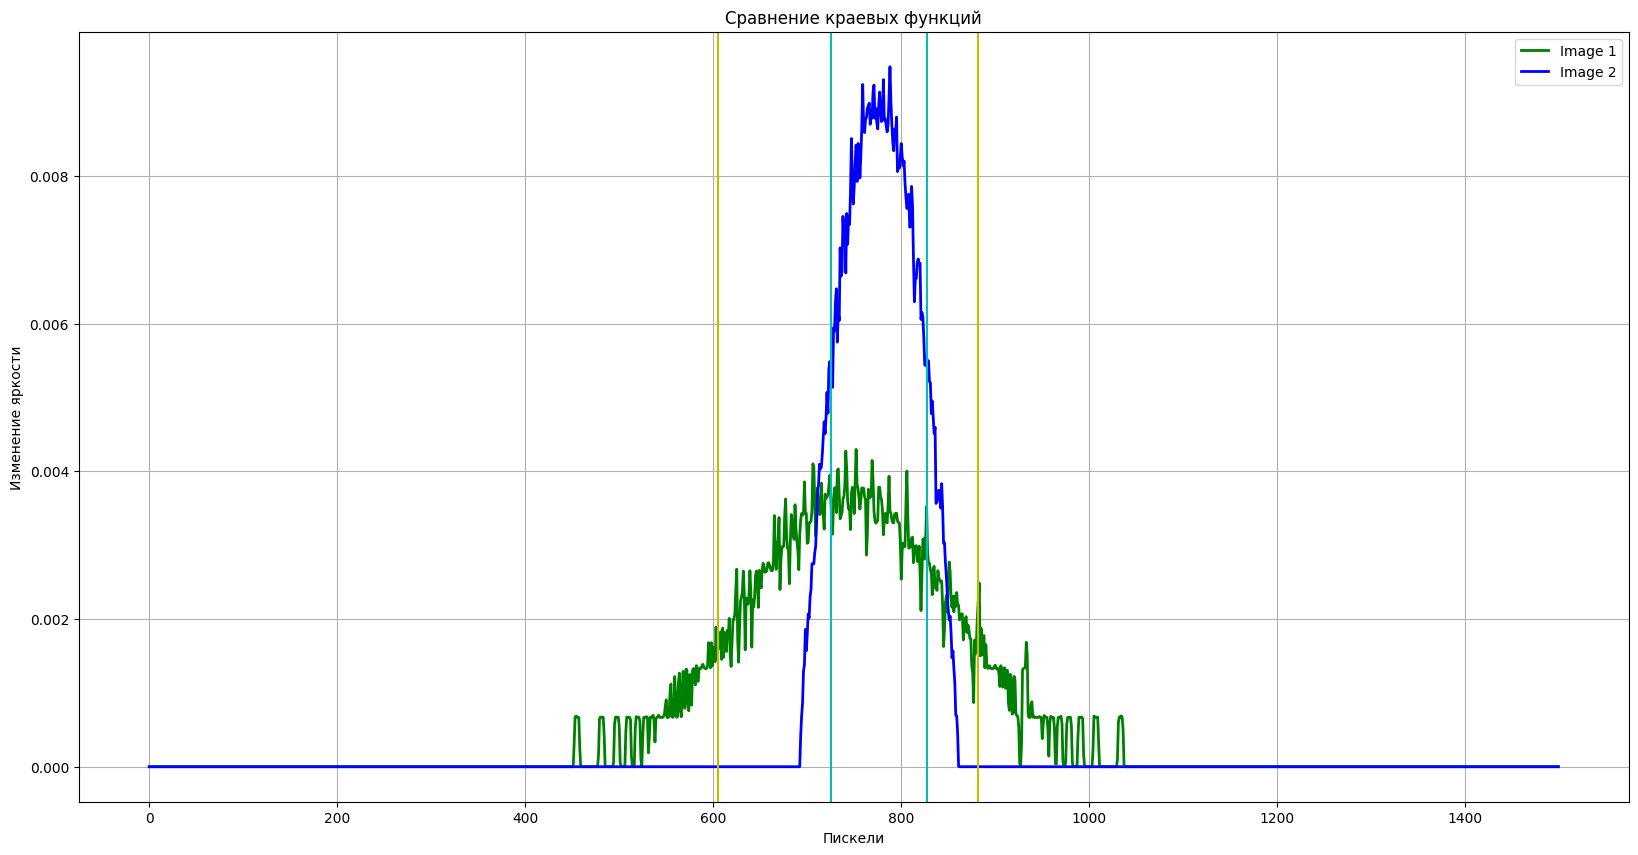

In [ ]:
step = 1 # Влияет только на отрисовку графика

frl1 = calc_line_blur(get_avg_row_colors(img1, step))
frl2 = calc_line_blur(get_avg_row_colors(img2, step))

compare_plot_frl("Сравнение краевых функций", list(range(0, len(avgs1))), frl1, frl2, "Image 1", "Image 2", s1, e1, s2, e2, step)